In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# this data set has data about survived and dead tiatanic passenger's details (name,age,sex,ticket,fare,ets.)
# data set has 891 rows and 12 columns
# out of these columns survived column is my label and remaining columns are my features
# label column has categorical data, label column has 2 Categories (survived and dead) hence i term it as Binary classificatin problem

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# as observed in .info() this data set contains integer,float,object data type
# out of all the columns age,cabin,embarked these column has null values 
# embarked column has huge amount of null values, if needed, if feel right i might drop this column in later part  
# Remaining column doesnt have any null value

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# this data set contains integer data, object data,float data
# will have to apply encoding techniques on name,sex,ticket,cabin,embarked columns

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
# Survived, Pclass, sex, SibSp, Parch, Embarked this column has categorical data
# remaining columns have Continuous data
# Survived column is my label and it has categorical data with 2 categories hence i term it as binary classification problem

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# as observed in .info() age,cabin,embarked these columns have null values
# Cabin column has huge null values

In [13]:
df.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,C46,S


In [14]:
# there is huge number of null values present in cabin column

In [15]:
# let's check value count for each column
columns = 0  
while columns < 12:
    column_name = df.columns[columns]
    print(f"Value counts for {column_name}:")
    print(df[column_name].value_counts())
    print('\n')
    columns += 1


Value counts for PassengerId:
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


Value counts for Survived:
0    549
1    342
Name: Survived, dtype: int64


Value counts for Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


Value counts for Name:
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


Value counts for Sex:
male      577
female    314
Name: Sex, dtype: int64


Value counts for Age:


In [16]:
# here i observed  Survived class has class imbalance issues lets visualise this

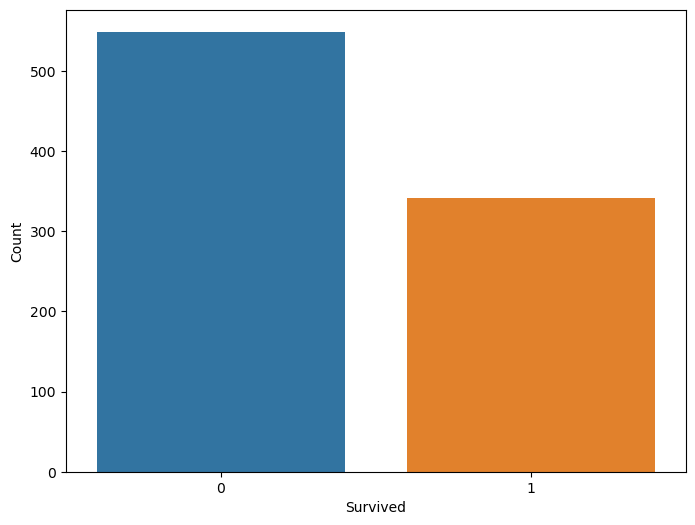

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [18]:
# her i can observed class imbalance between Survived and dead Passengers count.
# dead Passengers count is higher than survived Passengers

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# Amongst numerical columns age column has 177 null values for all the other ramaining numerical columns there are no null values oresent

# to get insight for data distribution mean and std value plays important roll. 

# here i can observe PassengerId,pclass,age, column has lesser std values in comparison to their respective mean values. in other remaining columns std values are slightly higer than their mean values.

# by comparing mean and std values of the columns i feel the data is not normally distributed.

# by Comparing mean and median values of the columns i observed that their is really little difference between mean and median of of all the columns.

# Survived, age, sibsp, parch these columns has Slightly higher mean value than their respective median value. with this i suspect there can be Slightly  right skewness present in these columns

# fare column's mean really high than its median i feel there is lot of right skewness is present in this column

# PassengerId column's mean and median is in exact sync (Numbers are same), this column has perfect Normally distributed data

# remaining columns like pclass these column has slightly higher median values than their respective mean values, hence i suspect their can be Slightly left skewness present in these columns

# i observed that for survived column min,q1,q2 values are exact same and q3 and max values are exact same.

# same with pclass column q2,q3, max has exact same values.

# there is huge gap in values of min and q1 and q3 and max of age column, there could be positive and negative outliers present in this column.

# in SibSp column min,q1,q2 has same value and q3 and max has huge gap in between

# in parch column min,q1,q2,q3 has same value and q3 and max has huge gap inbetween

# in fare column q3 and max has huge gap inbetween which indicates the Possible Presence of upside outliers.


In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df.shape

(891, 12)

In [23]:
# so far with non grafical analysis i Observed that ther is huge number of null vaslues present specifically in  cabin column
# there is Class imbalance issue in label column
# null values ARE present in age,cabin and embarked columns
# there are few columns with object data type, which i will have convert to numerical data type
# i feel before visualising data distribution i will have to resolve thes issue, this will make graphical analysis (Visualisation easyer)

In [24]:
# i will have to drop cabin column as it has huge number of null values and treating this issue with mean wont be realy helpful 
# also i feel  cain information will not be that much relevent to my analysis  

In [25]:
df.drop('Cabin', axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [26]:
# also i feel PassengerId,Name,Ticket these columns are also not relevant to my analysis hence i am dropping those columns as well
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)


In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [28]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [29]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
# Let's convert sex and Embarked Column's object data type to numerical data type through LabelEncoder
df1 = df.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['sex_Encoded'] = le.fit_transform(df['Sex'])
df1['Embarked_Encoded'] = le.fit_transform(df['Embarked'])
df1 = df1.drop(columns=['Sex','Embarked'])
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_Encoded,Embarked_Encoded
0,0,3,22.000000,1,0,7.2500,1,2
1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,26.000000,0,0,7.9250,0,2
3,1,1,35.000000,1,0,53.1000,0,2
4,0,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,2
887,1,1,19.000000,0,0,30.0000,0,2
888,0,3,29.699118,1,2,23.4500,0,2
889,1,1,26.000000,0,0,30.0000,1,0


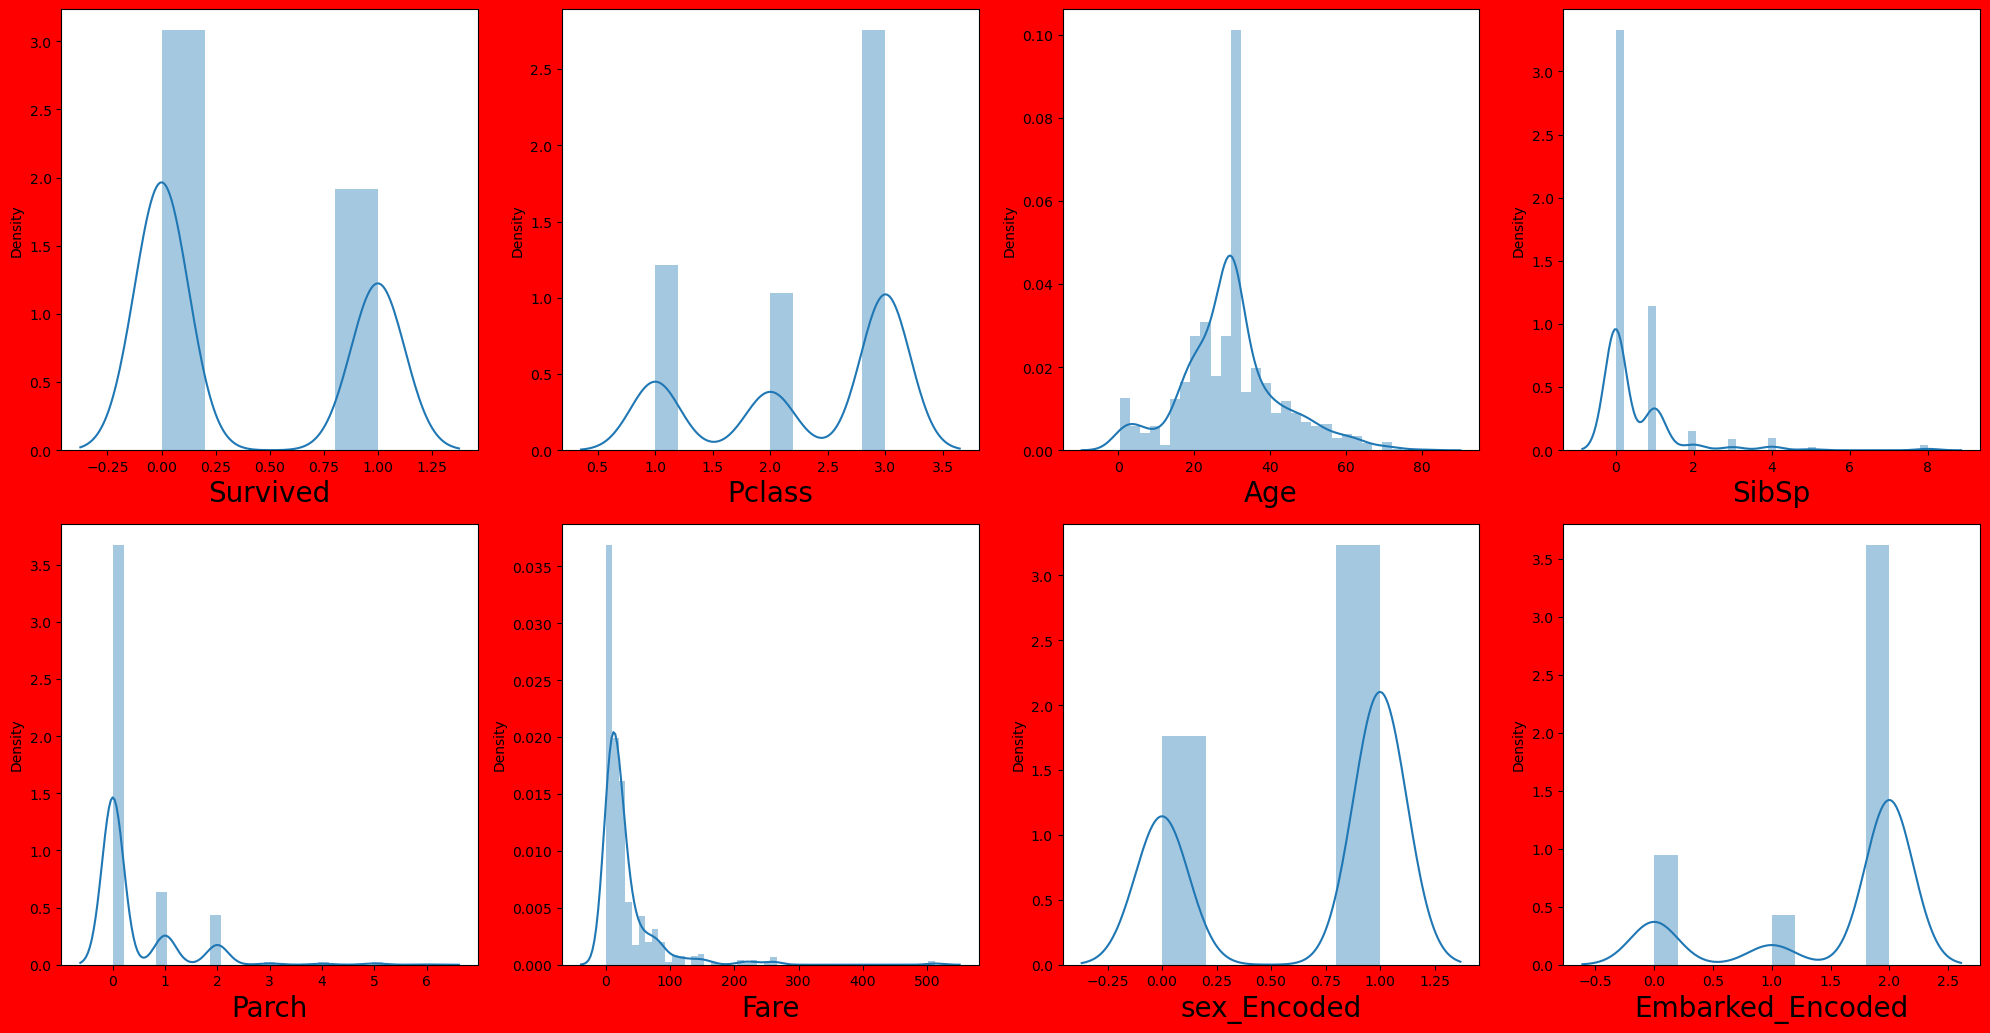

In [31]:
# lets visualise the data distribution through graphs
plt.figure(figsize=(20, 15), facecolor='red')

plotnumber = 1
for column in df1.columns: 
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber) 
        sns.distplot(df1[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [32]:
# her i can see right skewness in sibsp,fare,parch columns

In [34]:
# let's separate features and label
x = df1.drop(['Survived'],axis=1)
y = df1['Survived']

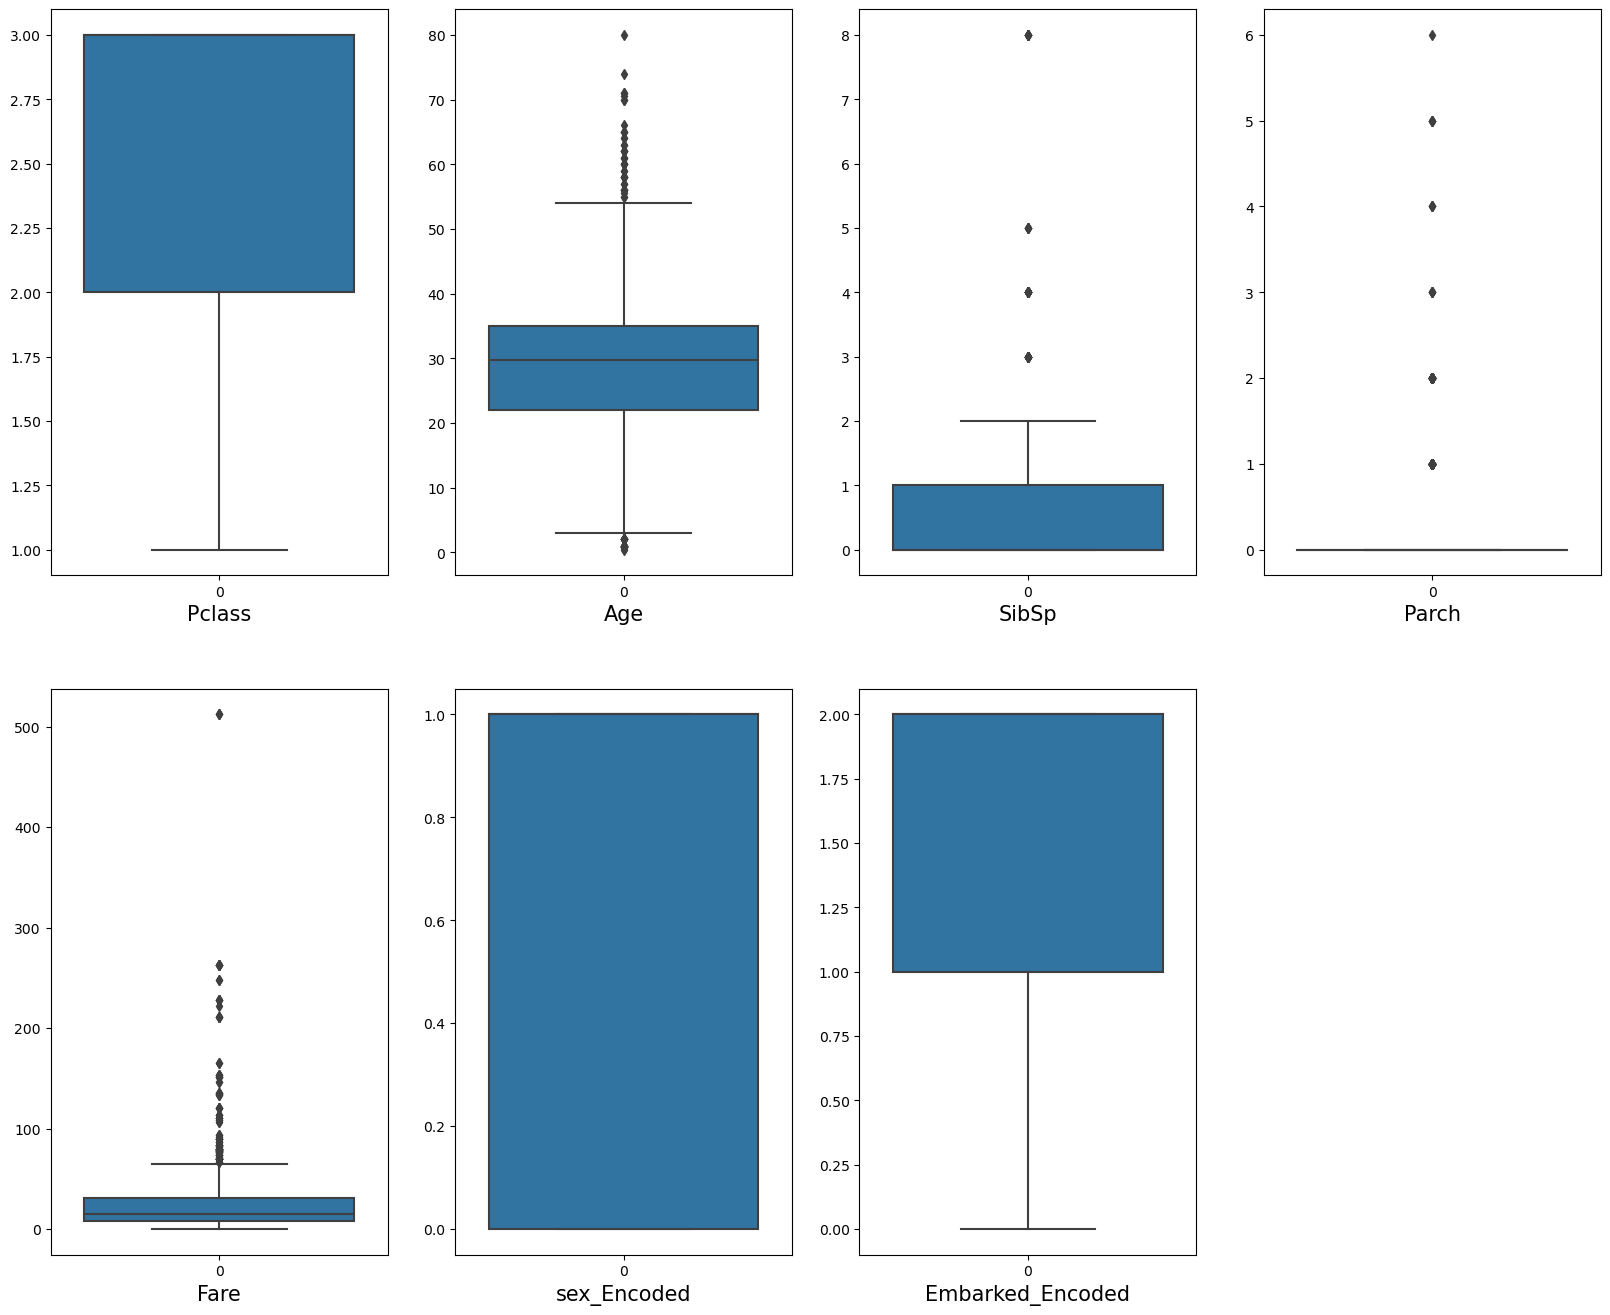

In [54]:
plt.figure(figsize=(20,25))
graph = 1
for column in x:
    if graph <=12:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [ ]:
# there are lots of outliers present in fare,age,sibsp,parch columns also data Distribution Between min,q1,q2,q3,max is not at all normal


In [45]:
df1.skew()

Survived            0.478523
Pclass             -0.441438
Age                 0.434488
SibSp               0.808608
Parch               1.228795
Fare               -0.040329
sex_Encoded        -0.618921
Embarked_Encoded   -1.264823
dtype: float64

In [42]:
# here i can see sibsp,parch,fare columns have high skewness also pclass has slight skewness

In [43]:
# Lets remove skewness from above mentioned columns
column_to_transform = ['Pclass','SibSp','Parch','Fare']
from scipy.stats import boxcox

for column in column_to_transform:
    df1[column], _ = boxcox(df1[column] + 1)
    
df1.skew()

Survived            0.478523
Pclass             -0.441438
Age                 0.434488
SibSp               0.808608
Parch               1.228795
Fare               -0.040329
sex_Encoded        -0.618921
Embarked_Encoded   -1.264823
dtype: float64

In [49]:
# there is still skewness in parch column lets handle it with yeojohnson Technique 

In [50]:
from scipy.stats import yeojohnson

df1['Parch'], _ = yeojohnson(df1['Parch'])


In [52]:
df1.skew()

Survived       0.478523
Pclass        -0.441438
Age            0.434488
SibSp          0.808608
Parch          1.225707
Fare          -0.040329
sex_Encoded   -0.618921
dtype: float64

In [53]:
# i am still not able to remove skewness from parch column maybe if i treat outliers the this issue will also resilve

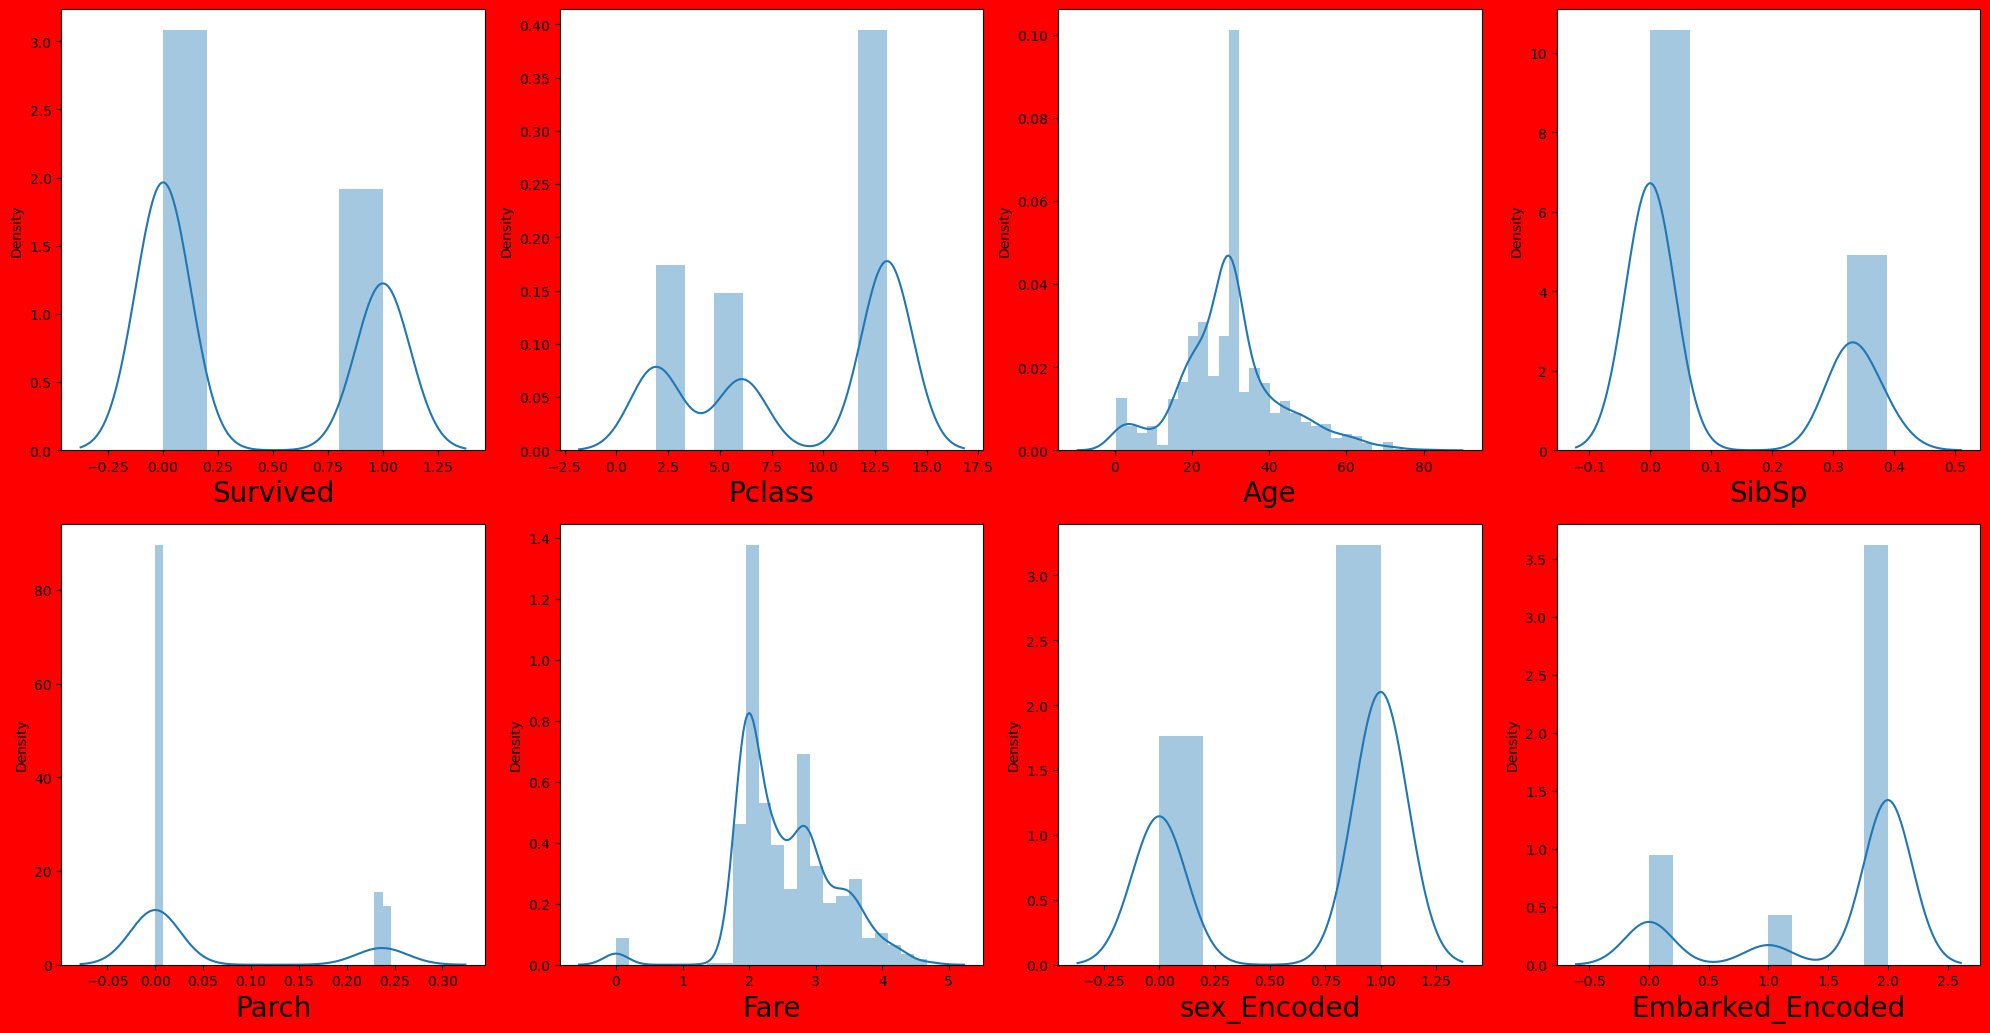

In [46]:
# lets visualise the data distribution through graphs
plt.figure(figsize=(20, 15), facecolor='red')

plotnumber = 1
for column in df1.columns: 
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber) 
        sns.distplot(df1[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [47]:
# i am dropping Embarked_Encoded column as well as i don't feel this column is relevant for my analysis 
df1.drop(['Embarked_Encoded'], axis=1, inplace=True)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_Encoded
0,0,13.082161,22.000000,0.323389,0.000000,1.906724,1
1,1,1.905985,38.000000,0.323389,0.000000,3.497640,0
2,1,13.082161,26.000000,0.000000,0.000000,1.970459,0
3,1,1.905985,35.000000,0.323389,0.000000,3.304258,0
4,0,13.082161,35.000000,0.000000,0.000000,1.981680,1
...,...,...,...,...,...,...,...
886,0,6.074735,27.000000,0.000000,0.000000,2.326029,1
887,1,1.905985,19.000000,0.000000,0.000000,2.916885,0
888,0,13.082161,29.699118,0.323389,0.243296,2.745246,0
889,1,1.905985,26.000000,0.000000,0.000000,2.916885,1


In [60]:
# let's Separate features and label and plot a box plot to check Outliers 
df_feature = df1.drop ('Survived',axis =1)
df_feature

,Pclass,Age,SibSp,Parch,Fare,sex_Encoded
0,13.082161,22.000000,0.323389,-0.000000,1.906724,1
1,1.905985,38.000000,0.323389,-0.000000,3.497640,0
2,13.082161,26.000000,0.000000,-0.000000,1.970459,0
3,1.905985,35.000000,0.323389,-0.000000,3.304258,0
4,13.082161,35.000000,0.000000,-0.000000,1.981680,1
...,...,...,...,...,...,...
886,6.074735,27.000000,0.000000,-0.000000,2.326029,1
887,1.905985,19.000000,0.000000,-0.000000,2.916885,0
888,13.082161,29.699118,0.323389,0.054461,2.745246,0
889,1.905985,26.000000,0.000000,-0.000000,2.916885,1


In [74]:
# let's scale the data 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Age,SibSp,Parch,Fare,sex_Encoded,Embarked_Encoded
0,0.827377,-5.924806e-01,0.432793,-0.473674,-0.502445,0.737695,0.585954
1,-1.566107,6.387890e-01,0.432793,-0.473674,0.786845,-1.355574,-1.942303
2,0.827377,-2.846632e-01,-0.474545,-0.473674,-0.488854,-1.355574,0.585954
3,-1.566107,4.079260e-01,0.432793,-0.473674,0.420730,-1.355574,0.585954
4,0.827377,4.079260e-01,-0.474545,-0.473674,-0.486337,0.737695,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,-2.077088e-01,-0.474545,-0.473674,-0.386671,0.737695,0.585954
887,-1.566107,-8.233437e-01,-0.474545,-0.473674,-0.044381,-1.355574,0.585954
888,0.827377,-2.232906e-16,0.432793,2.008933,-0.176263,-1.355574,0.585954
889,-1.566107,-2.846632e-01,-0.474545,-0.473674,-0.044381,0.737695,-1.942303


In [76]:
# using zscore method to treat outliers
from scipy.stats import zscore
z = np.abs(zscore(x))
z

,Pclass,Age,SibSp,Parch,Fare,sex_Encoded,Embarked_Encoded
0,0.827377,5.924806e-01,0.432793,0.473674,0.502445,0.737695,0.585954
1,1.566107,6.387890e-01,0.432793,0.473674,0.786845,1.355574,1.942303
2,0.827377,2.846632e-01,0.474545,0.473674,0.488854,1.355574,0.585954
3,1.566107,4.079260e-01,0.432793,0.473674,0.420730,1.355574,0.585954
4,0.827377,4.079260e-01,0.474545,0.473674,0.486337,0.737695,0.585954
...,...,...,...,...,...,...,...
886,0.369365,2.077088e-01,0.474545,0.473674,0.386671,0.737695,0.585954
887,1.566107,8.233437e-01,0.474545,0.473674,0.044381,1.355574,0.585954
888,0.827377,1.834173e-16,0.432793,2.008933,0.176263,1.355574,0.585954
889,1.566107,2.846632e-01,0.474545,0.473674,0.044381,0.737695,1.942303


In [77]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885]),
 array([3, 2, 3, 4, 2, 2, 2, 2, 3, 4, 1, 1, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        4, 2, 2, 2, 4, 4, 2, 4, 3, 4, 4, 2, 3, 3, 4, 2, 1, 4, 2, 2, 4, 3,
        3, 1, 3, 1, 3, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4, 1, 3, 4, 2, 2, 2, 2,
        2, 2, 1, 3, 2, 3]))

In [78]:
z.iloc[851,1]

3.4091456386947017

In [79]:
df_zscore = df1[(z<3).all(axis=1)]

In [80]:
df_zscore.shape

(820, 7)

In [81]:
print('old df shape-',df1.shape[0])
print('df_zscore shape-',df_zscore.shape[0])


old df shape- 891
df_zscore shape- 820


In [82]:
print ('data loss percentage ',((df1.shape[0]-df_zscore.shape[0])/df1.shape[0])*100)

data loss percentage  7.968574635241302


In [84]:
#IQR METHOD
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3-Q1
df_iqr = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [85]:
print('old df shape-',df1.shape[0])
print('df_zscore shape-',df_zscore.shape[0])
print('df_iqr shape-',df_iqr.shape[0])

old df shape- 891
df_zscore shape- 820
df_iqr shape- 0


In [86]:
# so here i am loosing more data if i use IQR method to treat outliers
# Comparatively i loose less data with zscore so i will use zscore method only

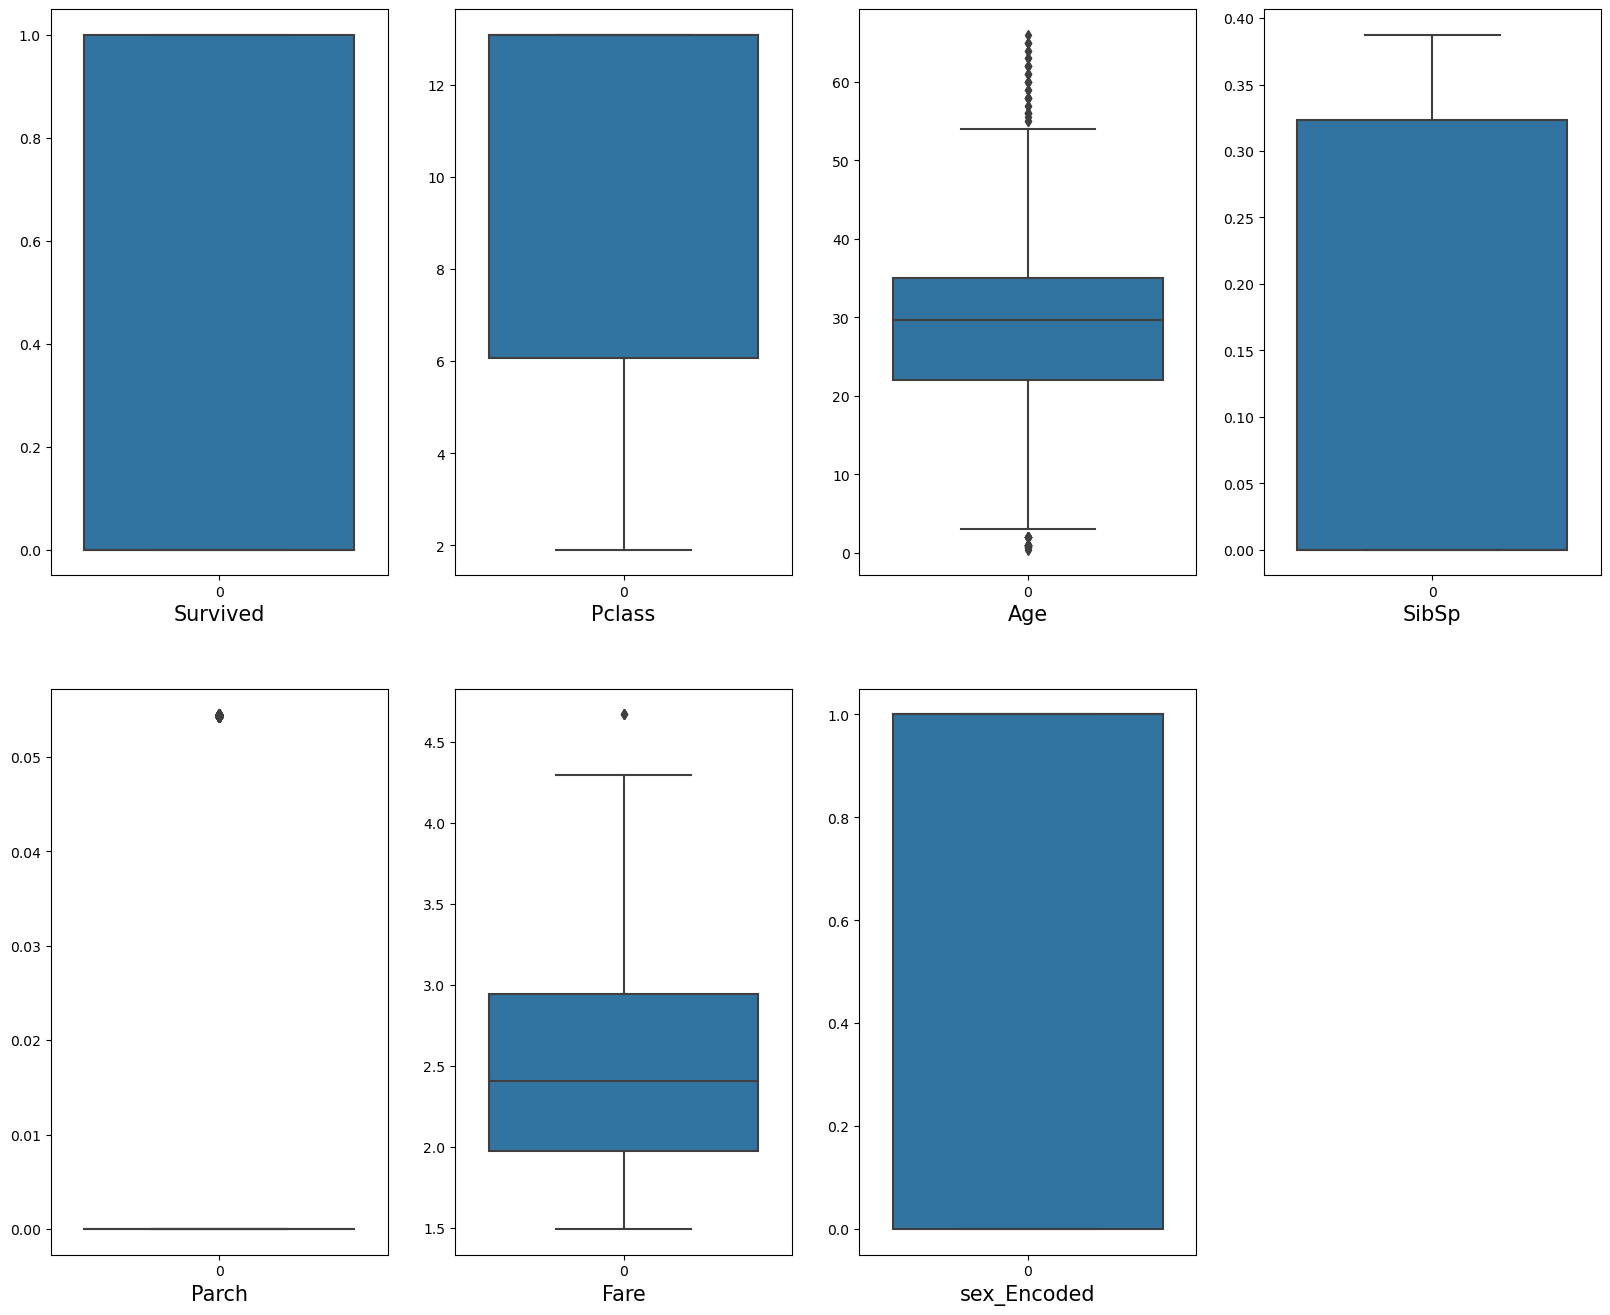

In [71]:
plt.figure(figsize=(20,25))
graph = 1
for column in df_zscore:
    if graph <=12:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data=df_zscore[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [87]:
# so here i Separated Features (x) and label(y)
# then i used standard scalar to scale the features dtat
# then on this scaled data i applied z_score and IQR method to remove outliers
# here i observed if i use z_score i will loose almost 8% of data Within range of acceptable data lose(10%)
# but if i use IQR to treat outliers then i will loose 100% of data, hence using z_score to treat out liers

In [92]:
cor = df_zscore.corr()
cor

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_Encoded
Survived,1.000000,-0.322660,-0.090926,0.155366,0.210997,0.362114,-0.554888
Pclass,-0.322660,1.000000,-0.315677,-0.131705,-0.087246,-0.648613,0.142772
Age,-0.090926,-0.315677,1.000000,-0.102586,-0.243862,0.134047,0.094544
SibSp,0.155366,-0.131705,-0.102586,1.000000,0.350246,0.401339,-0.212975
Parch,0.210997,-0.087246,-0.243862,0.350246,1.000000,0.309220,-0.252411
Fare,0.362114,-0.648613,0.134047,0.401339,0.309220,1.000000,-0.270564
sex_Encoded,-0.554888,0.142772,0.094544,-0.212975,-0.252411,-0.270564,1.000000


In [94]:

correlation_matrix = df_zscore.corr()

Survived_correlation = correlation_matrix['Survived']

print(Survived_correlation)


Survived       1.000000
Pclass        -0.322660
Age           -0.090926
SibSp          0.155366
Parch          0.210997
Fare           0.362114
sex_Encoded   -0.554888
Name: Survived, dtype: float64


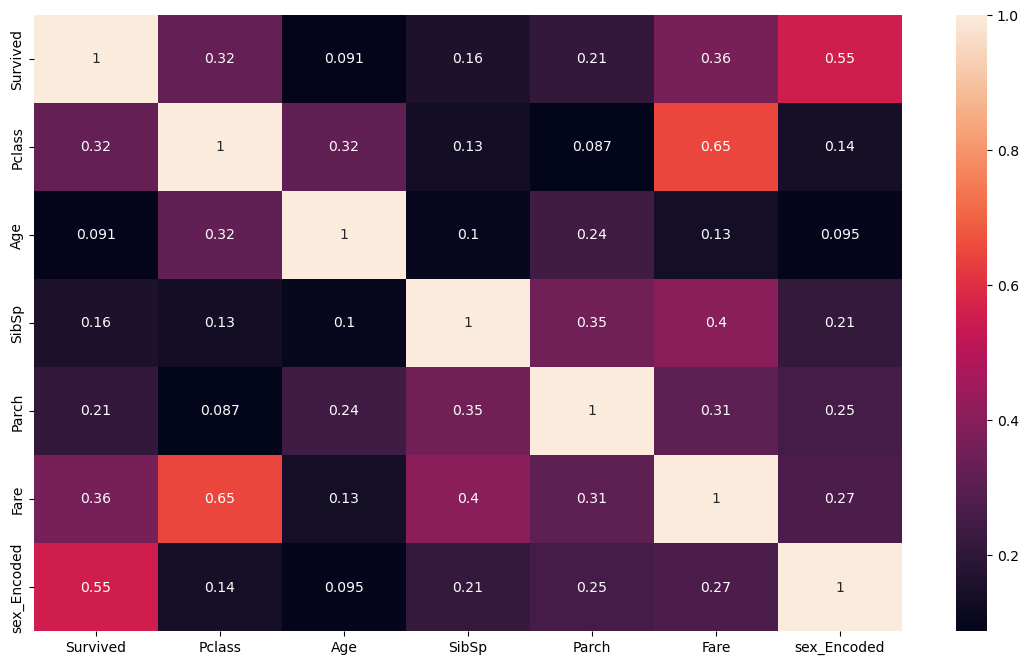

In [95]:
df_coef = df_zscore.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_coef,annot=True)
plt.show()

In [96]:
# after lookin at Correlation matrix and heat map
# i observed that all the feathers have high medium to low Correction with the label
# as well as all the features have medium to low correlation with each other
# hence i feel there is no multicollinearity present between features 

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['VIF features'] = x.columns
vif

,VIF values,VIF features
0,1.671580,Pclass
1,1.205639,Age
2,1.282325,SibSp
3,1.322550,Parch
4,1.648696,Fare
5,1.108869,sex_Encoded
6,1.079324,Embarked_Encoded


In [100]:
# VIF scores also Suggests that there is no multicollinearity present amongst the features 

In [104]:
# lets Separate features and label again after scaling and applying z_score to treat outliers
# let's separate features and label
x_process = df_zscore.drop(['Survived'],axis=1)
y_process= df_zscore['Survived']
x_process

,Pclass,Age,SibSp,Parch,Fare,sex_Encoded
0,13.082161,22.000000,0.323389,-0.000000,1.906724,1
1,1.905985,38.000000,0.323389,-0.000000,3.497640,0
2,13.082161,26.000000,0.000000,-0.000000,1.970459,0
3,1.905985,35.000000,0.323389,-0.000000,3.304258,0
4,13.082161,35.000000,0.000000,-0.000000,1.981680,1
...,...,...,...,...,...,...
886,6.074735,27.000000,0.000000,-0.000000,2.326029,1
887,1.905985,19.000000,0.000000,-0.000000,2.916885,0
888,13.082161,29.699118,0.323389,0.054461,2.745246,0
889,1.905985,26.000000,0.000000,-0.000000,2.916885,1


In [105]:
x_train,x_test,y_train,y_test = train_test_split(x_process, y_process,test_size=0.25,random_state=41)